# Contents
## 1. Importing libraries & data
## 2. Data Preprocessing
## 3. Data Visualization

### 1. Importing libraries & data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/Churn_Modelling.csv',sep=',')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


A total of 10002 customer data is provided in this dataset. These are the features that will be used to determine churn:
- CreditScore: Credit Score of the customer. It is a 3 digit number designed to represent the customer's credit risk. The higher the score, the better their credit risk.
- Geography: This dataset is collected from customers residing in these 3 countries. The countries are France, Germany and Spain.
- Gender: Customer's gender
- Age: Customer's age
- Tenure: The tenure is the number of years that the customer has been with the bank.
- Balance: This is how much account balance the customer have in their personal account.
- NumOfProducts: This is the number of products that the customer have subscribed with the bank
- HasCrCard: This shows whether the customer have a credit card. 1 represents yes while 0 represents no
- IsActiveMember: This shows whether the customer is active with the bank. Binary flag where 1 represents yes while 0 represents no.
- EstimatedSalary: Estimated salary of the customer
- Exited: Whether the customer has churned from this bank. 1 represents yes while 0 represents no.


### 2. Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
mean_age=round(df['Age'].mean())
df['Age'].fillna(value=mean_age,inplace=True)
df['HasCrCard'].mode()
df['HasCrCard'].fillna(value=1,inplace=True)
df['IsActiveMember'].mode()
df['IsActiveMember'].fillna(value=1,inplace=True)

In [7]:
df['IsActiveMember'].mode()

0    1.0
Name: IsActiveMember, dtype: float64

In [8]:
df['IsActiveMember'].fillna(value=1,inplace=True)

### 3. Data Visualization

In [9]:
churned=df['Exited'].value_counts()
churned.values

array([7964, 2038], dtype=int64)

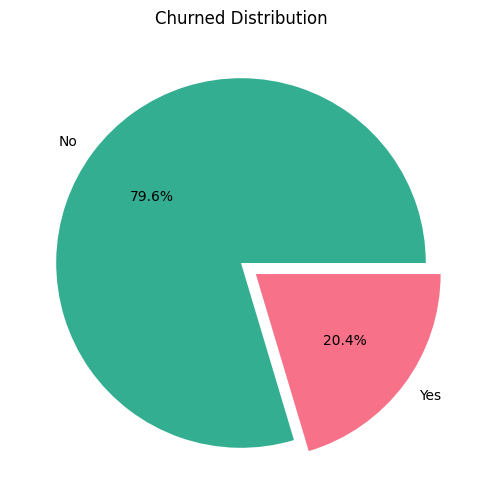

In [10]:
plt.figure(figsize=(14,6))
labels=['No','Yes']
#colors=sns.color_palette("husl")
plt.pie(churned.values,labels=labels,autopct="%1.1f%%",explode=(0,0.1),colors=['#34ae91','#f77189'])
plt.title('Churned Distribution')
plt.show()

This shows the churned distribution of the customers. From the data, about 20% of the customers have ended their arrangement with the bank.

In [11]:
df['Exited']=df['Exited'].map({1: 'yes', 0: 'no'})
df['HasCrCard']=df['HasCrCard'].map({1: 'Yes', 0: 'No'})
df['IsActiveMember']=df['IsActiveMember'].map({1: 'Yes', 0: 'No'})

Text(0, 0.5, 'Customer Count')

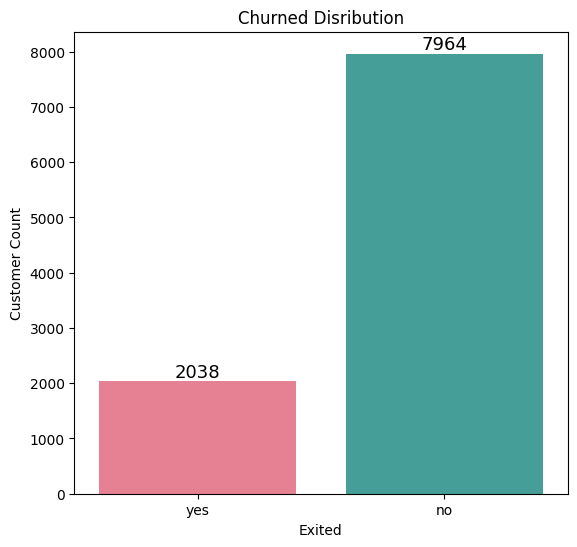

In [12]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)

labels=['No','Yes']
ax=sns.countplot(x='Exited',data=df,palette='husl')
ax.bar_label(ax.containers[0],size=13)
plt.title("Churned Disribution")
plt.ylabel('Customer Count')

This shows the exact number of customers that exited. This data itself is imbalanced. This usually happen in datasets like churn, fraud detection and rare diseases, where the data is skewed towards one end. Smote will be used later to balance the dataset by generating synthetic samples to give the models a better chance to learn from the minority class.

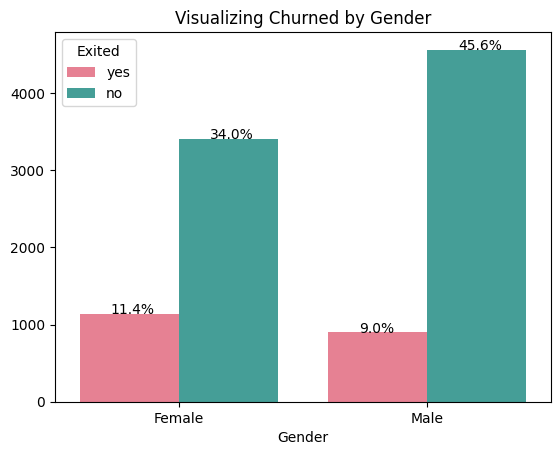

In [13]:
ax=sns.countplot(x="Gender",data=df,hue='Exited',palette='husl')

for value in ax.patches:
    percent='{:.1f}%'.format(100*value.get_height()/len(df['Gender']))
    x=value.get_x()+value.get_width()/2-0.05
    y=value.get_y()+value.get_height()
    ax.annotate(percent,(x-0.025,y),size=10)
    
plt.ylabel('')
plt.title('Visualizing Churned by Gender')
plt.show()

The churned probability is slightly more for female customers as compared to male customers, which means that more female customers are deactivating their banking services as compared to male.

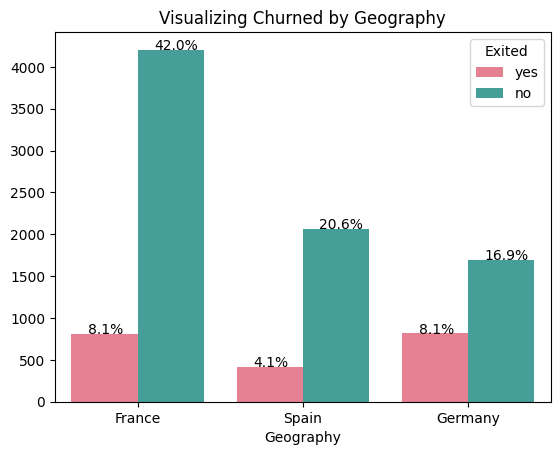

In [14]:
ax=sns.countplot(x="Geography",data=df,hue='Exited',palette='husl')

for value in ax.patches:
    percent='{:.1f}%'.format(100*value.get_height()/len(df['Geography']))
    x=value.get_x()+value.get_width()/2-0.1
    y=value.get_y()+value.get_height()
    ax.annotate(percent,(x,y),size=10)
    
plt.ylabel('')
plt.title('Visualizing Churned by Geography')
plt.show()

From the visualisation, about half of the customers are from France. The churned rate of Spain and France are almost identical and they are around 20% of the customers that are residing in that country. Compared to Germany, there is more satisfaction with the bank as the churned rate is significantly lower.

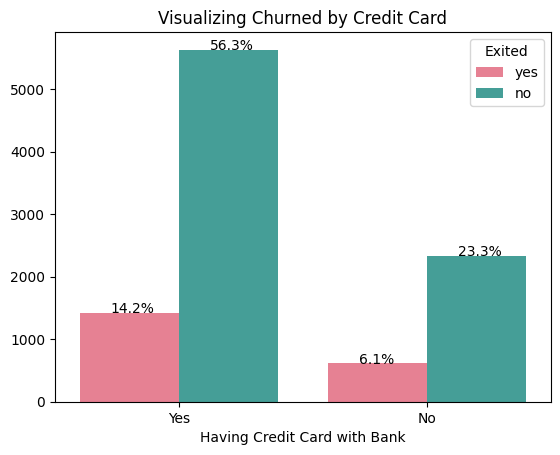

In [15]:
ax=sns.countplot(x="HasCrCard",data=df,hue='Exited',palette='husl')

for value in ax.patches:
    percent='{:.1f}%'.format(100*value.get_height()/len(df['HasCrCard']))
    x=value.get_x()+value.get_width()/2-0.05
    y=value.get_y()+value.get_height()
    ax.annotate(percent,(x-0.025,y),size=10)
    
plt.ylabel('')
plt.title('Visualizing Churned by Credit Card')
plt.xlabel('Having Credit Card with Bank')
plt.show()

More than 70% of customers have a credit card. The churned rate for both categories are almost identical and they are around 20%. An early inference can be made where having a credit card or not does not have a strong influence in customer churning.

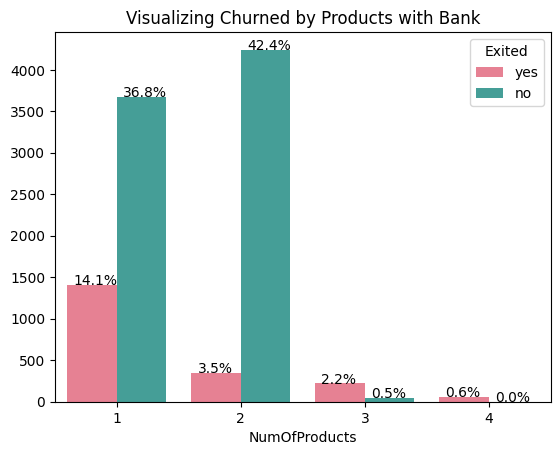

In [16]:
ax=sns.countplot(x="NumOfProducts",data=df,hue='Exited',palette='husl')

for value in ax.patches:
    percent='{:.1f}%'.format(100*value.get_height()/len(df['NumOfProducts']))
    x=value.get_x()+value.get_width()/2-0.15
    y=value.get_y()+value.get_height()
    ax.annotate(percent,(x,y),size=10)
    
plt.ylabel('')
plt.title('Visualizing Churned by Products with Bank')
plt.show()

When we visualise churn by products with the bank, most of the customers have either 1 or 2 total products. There is a relatively high churn rate in customers having 1 product as compared to the rest.

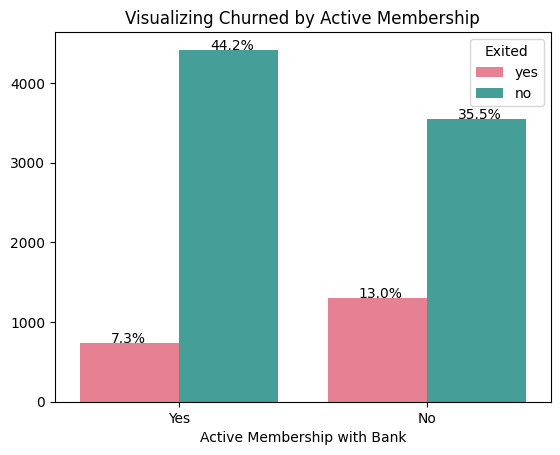

In [17]:
ax=sns.countplot(x="IsActiveMember",data=df,hue='Exited',palette='husl')

for value in ax.patches:
    percent='{:.1f}%'.format(100*value.get_height()/len(df['IsActiveMember']))
    x=value.get_x()+value.get_width()/2-0.05
    y=value.get_y()+value.get_height()
    ax.annotate(percent,(x-0.025,y),size=10)
    
plt.ylabel('')
plt.title('Visualizing Churned by Active Membership')
plt.xlabel('Active Membership with Bank')
plt.show()

When we visualise churn by active membership, it can be oberved that customers who are more active have a significantly lower rate of churned as compared to customers who are not active.

In [18]:
bins=[18, 30, 40, 50, 60, 70,100]
labels=['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

df['AgeGroup']=pd.cut(df['Age'],bins=bins,labels=labels)

In [19]:
churncount=df[df['Exited']=='yes']['AgeGroup'].value_counts()
churncount

40-49    789
30-39    538
50-59    448
18-29    146
60-69    104
70+       11
Name: AgeGroup, dtype: int64

Text(0.5, 1.0, 'Visualizing Churned by Age Group')

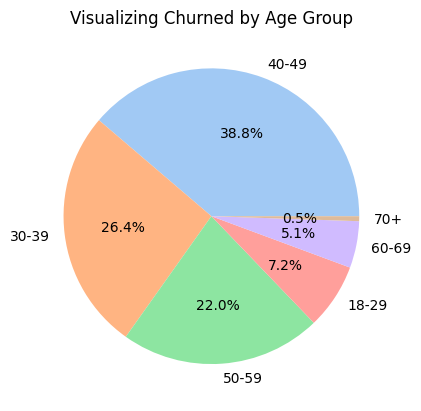

In [20]:
plt.pie(churncount,labels=churncount.index,autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title('Visualizing Churned by Age Group')

When we visualise by age group, more than 65% of the customers are from 30-49.

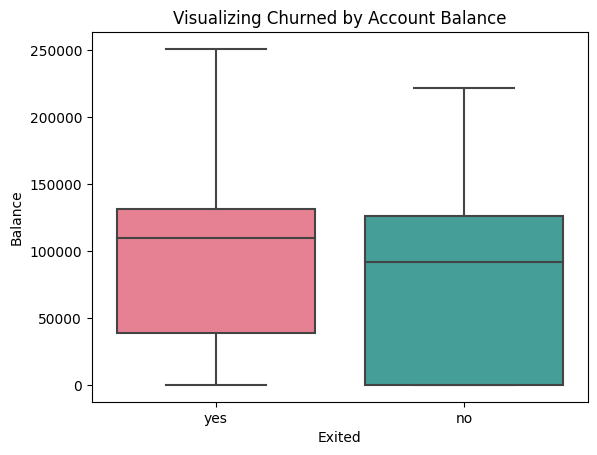

In [21]:
sns.boxplot(x='Exited',y='Balance',data=df,palette='husl')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.title('Visualizing Churned by Account Balance')
plt.show()

When we look at account balance, there are a lot of customers that have 0 in their account. This is probably due to inactive accounts and them not doing anything with their accounts.

In [22]:
con=[(df["Balance"]==0), (df["Balance"]>0)]
balance=["Zero Balance","Cash in Bank"]

In [23]:
df['Balance_2']=np.select(con,balance)

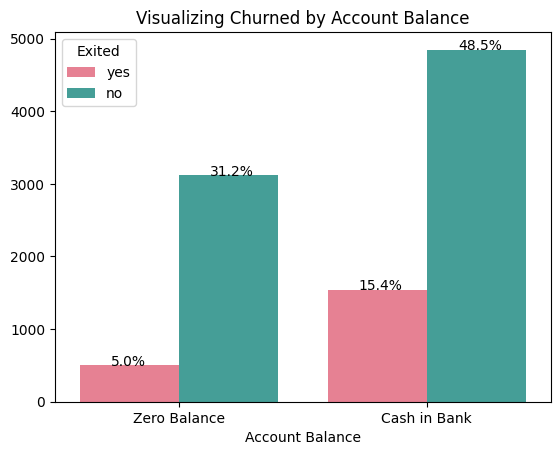

In [24]:
ax=sns.countplot(x="Balance_2",data=df,hue='Exited',palette='husl')

for value in ax.patches:
    percent='{:.1f}%'.format(100*value.get_height()/len(df['Balance_2']))
    x=value.get_x()+value.get_width()/2-0.05
    y=value.get_y()+value.get_height()
    ax.annotate(percent,(x-0.025,y),size=10)
    
plt.ylabel('')
plt.title('Visualizing Churned by Account Balance')
plt.xlabel('Account Balance')
plt.show()

Of the 36% of customers that have a 0 balance in their accounts, only 5% of them exited. This may be attributed to the fact that some of the customers just leave their accounts inactive and not doing anything with it.